In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Read into csv file
schools_csv_file = "./Resources/dv279-schoollocations2019.csv"
schools_df = pd.read_csv(schools_csv_file)
schools_df.head()

Education_Sector  Entity_Type  School_No  \
0       Government            1          1   
1       Government            1          3   
2       Government            1          4   
3       Government            1          8   
4       Government            1         12   

                              School_Name School_Type School_Status  \
0                 Alberton Primary School     Primary             O   
1  Allansford and District Primary School     Primary             O   
2                    Avoca Primary School     Primary             O   
3                   Avenel Primary School     Primary             O   
4               Warrandyte Primary School     Primary             O   

       Address_Line_1 Address_Line_2 Address_Town Address_State  ...  \
0   21 Thomson Street            NaN     Alberton           VIC  ...   
1        Frank Street            NaN   Allansford           VIC  ...   
2  118 Barnett Street            NaN        Avoca           VIC  ...   
3  40 Anderson Street            NaN       Avenel           VIC  ...   
4  5-11 Forbes Street            NaN   Warrandyte           VIC  ...   

   Postal_Address_Line_1 Postal_Address_Line_2 Postal_Town Postal_State  \
0      21 Thomson Street                   NaN    ALBERTON          VIC   
1           Frank Street                   NaN  ALLANSFORD          VIC   
2             P O Box 12                   NaN       AVOCA          VIC   
3     40 Anderson Street                   NaN      AVENEL          VIC   
4     5-11 Forbes Street                   NaN  WARRANDYTE          VIC   

  Postal_Postcode  Full_Phone_No LGA_ID         LGA_Name           X  \
0            3971   03 5183 2412    681   Wellington (S)  146.666601   
1            3277   03 5565 1382    673  Warrnambool (C)  142.590393   
2            3467   03 5465 3176    599     Pyrenees (S)  143.475649   
3            3664   03 5796 2264    643  Strathbogie (S)  145.234722   
4            3113   03 9844 3537    421   Manningham (C)  145.213980   

           Y  
0 -38.617713  
1 -38.386281  
2 -37.084502  
3 -36.901368  
4 -37.742675  

[5 rows x 21 columns]

In [3]:
# Drop unwanted columns
to_drop = ["School_Status",
          "Address_Line_1",
          "Address_Line_2",
          "Address_Town",
          "Address_State",
          "Postal_Address_Line_2",
          "Full_Phone_No",
          "Address_Postcode",
          "Postal_State"]

schools_df.drop(columns=to_drop, inplace=True)

In [4]:
schools_df.head()

Education_Sector  Entity_Type  School_No  \
0       Government            1          1   
1       Government            1          3   
2       Government            1          4   
3       Government            1          8   
4       Government            1         12   

                              School_Name School_Type Postal_Address_Line_1  \
0                 Alberton Primary School     Primary     21 Thomson Street   
1  Allansford and District Primary School     Primary          Frank Street   
2                    Avoca Primary School     Primary            P O Box 12   
3                   Avenel Primary School     Primary    40 Anderson Street   
4               Warrandyte Primary School     Primary    5-11 Forbes Street   

  Postal_Town  Postal_Postcode  LGA_ID         LGA_Name           X          Y  
0    ALBERTON             3971     681   Wellington (S)  146.666601 -38.617713  
1  ALLANSFORD             3277     673  Warrnambool (C)  142.590393 -38.386281  
2       AVOCA             3467     599     Pyrenees (S)  143.475649 -37.084502  
3      AVENEL             3664     643  Strathbogie (S)  145.234722 -36.901368  
4  WARRANDYTE             3113     421   Manningham (C)  145.213980 -37.742675

In [5]:
# Split LGA Name
schools_df["LGA_Name"] = schools_df.LGA_Name.apply(lambda x: pd.Series(str(x).split(" "))) 

In [6]:
# Capitalise and lower postal town names
schools_df["Postal_Town"] = schools_df.Postal_Town.apply(lambda x: pd.Series(str(x).lower().title()))

In [7]:
schools_df.head()

Education_Sector  Entity_Type  School_No  \
0       Government            1          1   
1       Government            1          3   
2       Government            1          4   
3       Government            1          8   
4       Government            1         12   

                              School_Name School_Type Postal_Address_Line_1  \
0                 Alberton Primary School     Primary     21 Thomson Street   
1  Allansford and District Primary School     Primary          Frank Street   
2                    Avoca Primary School     Primary            P O Box 12   
3                   Avenel Primary School     Primary    40 Anderson Street   
4               Warrandyte Primary School     Primary    5-11 Forbes Street   

  Postal_Town  Postal_Postcode  LGA_ID     LGA_Name           X          Y  
0    Alberton             3971     681   Wellington  146.666601 -38.617713  
1  Allansford             3277     673  Warrnambool  142.590393 -38.386281  
2       Avoca             3467     599     Pyrenees  143.475649 -37.084502  
3      Avenel             3664     643  Strathbogie  145.234722 -36.901368  
4  Warrandyte             3113     421   Manningham  145.213980 -37.742675

In [8]:
# Rename postcode column
schools_df = schools_df.rename(columns={"Postal_Postcode": "Postcode",
                                       "Postal_Town": "Suburb",
                                       "X": "Lat",
                                       "Y": "Lng"})
schools_df

Education_Sector  Entity_Type  School_No  \
0          Government            1          1   
1          Government            1          3   
2          Government            1          4   
3          Government            1          8   
4          Government            1         12   
...               ...          ...        ...   
2249         Catholic            2       2222   
2250      Independent            2       2223   
2251         Catholic            2       2224   
2252         Catholic            2       2225   
2253         Catholic            2       2226   

                                           School_Name School_Type  \
0                              Alberton Primary School     Primary   
1               Allansford and District Primary School     Primary   
2                                 Avoca Primary School     Primary   
3                                Avenel Primary School     Primary   
4                            Warrandyte Primary School     Primary   
...                                                ...         ...   
2249  Our Lady Star of the Sea Catholic Primary School     Primary   
2250                           Maxwell Creative School     Primary   
2251                                 St Anne&#39;s College     Pri/Sec   
2252              Holy Trinity Catholic Primary School     Primary   
2253                   Glowrey Catholic Primary School     Primary   

     Postal_Address_Line_1      Suburb  Postcode  LGA_ID     LGA_Name  \
0        21 Thomson Street    Alberton      3971     681   Wellington   
1             Frank Street  Allansford      3277     673  Warrnambool   
2               P O Box 12       Avoca      3467     599     Pyrenees   
3       40 Anderson Street      Avenel      3664     643  Strathbogie   
4       5-11 Forbes Street  Warrandyte      3113     421   Manningham   
...                    ...         ...       ...     ...          ...   
2249    6 Cowes-Rhyll Road       Cowes      3922      74         Bass   
2250     6 Rainy Hill Road    Cockatoo      3781     145     Cardinia   
2251    72 Wendouree Drive      Kialla      3631     283      Greater   
2252    145 Mitchells Lane     Sunbury      3429     327         Hume   
2253      10 Baltrum Drive     Wollert      3750     707   Whittlesea   

             Lat        Lng  
0     146.666601 -38.617713  
1     142.590393 -38.386281  
2     143.475649 -37.084502  
3     145.234722 -36.901368  
4     145.213980 -37.742675  
...          ...        ...  
2249  145.239805 -38.463698  
2250  145.518028 -37.923946  
2251  145.400337 -36.436121  
2252  144.705316 -37.584791  
2253  145.031776 -37.615822  

[2254 rows x 12 columns]

In [9]:
# Retrieve postcode and suburbs
suburb_lga_df = schools_df[["Suburb", "LGA_Name"]]
suburb_lga_df = suburb_lga_df.drop_duplicates()

# Export into a csv file
suburb_lga_df.to_csv("./output/suburb_lga_df.csv", index=False)

In [10]:
# Read into created csv
suburb_lga = pd.read_csv("./output/suburb_lga_df.csv")
suburb_lga

Suburb     LGA_Name
0           Alberton   Wellington
1         Allansford  Warrnambool
2              Avoca     Pyrenees
3             Avenel  Strathbogie
4         Warrandyte   Manningham
..               ...          ...
962  Truganina South      Wyndham
963         Richmond    Melbourne
964        Koonwarra         Bass
965     Rosebud West   Mornington
966          Fitzroy    Frankston

[967 rows x 2 columns]

In [11]:
suburb_lga_postcode_df = schools_df[["Suburb", "Postcode", "LGA_ID", "LGA_Name"]]

suburb_lga_postcode_df = suburb_lga_postcode_df.drop_duplicates()

# Export into a csv file
suburb_lga_postcode_df.to_csv("./output/suburb_lga_postcode_df.csv", index=False)

In [12]:
# Read into created csv
suburb_lga_postcode = pd.read_csv("./output/suburb_lga_postcode_df.csv")
suburb_lga_postcode

Suburb  Postcode  LGA_ID     LGA_Name
0           Alberton      3971     681   Wellington
1         Allansford      3277     673  Warrnambool
2              Avoca      3467     599     Pyrenees
3             Avenel      3664     643  Strathbogie
4         Warrandyte      3113     421   Manningham
..               ...       ...     ...          ...
983  Truganina South      3029     726      Wyndham
984         Richmond      3121     460    Melbourne
985        Koonwarra      3954      74         Bass
986     Rosebud West      3939     534   Mornington
987          Fitzroy      3065     217    Frankston

[988 rows x 4 columns]

In [16]:
# Groupby suburbs by LGA name
grouped_schools_df = schools_df.groupby(["LGA_Name"])

# Find number of schools in each suburb
schools_count = grouped_schools_df["School_Name"].count()
schools_count

# Create a new df with school count
schools_count_df = schools_count.reset_index()
schools_count_df

# Rename column
schools_count_df = schools_count_df.rename(columns={"School_Name": "School Count"})
schools_count_df

LGA_Name  School Count
0         Alpine            11
1         Ararat            13
2       Ballarat            47
3        Banyule            42
4           Bass            14
..           ...           ...
71    Whittlesea            52
72       Wodonga            16
73       Wyndham            51
74         Yarra           108
75  Yarriambiack            13

[76 rows x 2 columns]

In [21]:
# Import percent change in LGA's median housing price file
percent_change_file = ("./MT_resources/percent_change_perLGA.csv")
percent_change_df = pd.read_csv(percent_change_file)
percent_change_df

LGA_Name  Percent change in house price  Total Sales
0       Banyule                     -11.610266         2285
1       Bayside                      11.899379         2095
2    Boroondara                      -6.213793         2388
3      Brimbank                       1.093687         2251
4      Cardinia                      -1.474852         2173
5         Casey                       3.280064         5044
6       Darebin                      -5.931583         2699
7     Frankston                      -3.332706         2939
8          Glen                     -14.238339         2552
9       Greater                      -2.125233         2507
10      Hobsons                       0.972562         2347
11         Hume                      -3.848849         3986
12     Kingston                     -10.483110         2909
13         Knox                       4.718328         2520
14   Manningham                      -3.998614         1845
15  Maribyrnong                       0.411944         1243
16    Maroondah                       1.221407         1864
17    Melbourne                      -5.434380         3461
18       Melton                       3.140718         1768
19       Monash                       6.188759         2370
20       Moonee                      -6.223026         1894
21     Moreland                      -5.352872         2814
22   Mornington                       3.143202         3464
23    Nillumbik                      -7.102871         1742
24         Port                      -1.073704         3250
25  Stonnington                      18.775694         1746
26   Whitehorse                     -10.878944         3067
27   Whittlesea                      -4.102611         3659
28      Wyndham                      -1.821427         3792
29        Yarra                      -6.507968         4106

In [22]:
# Merge school count into percent change per LGA df
merged_lga_school_df = pd.merge(percent_change_df, schools_count_df, on="LGA_Name")
merged_lga_school_df

LGA_Name  Percent change in house price  Total Sales  School Count
0       Banyule                     -11.610266         2285            42
1       Bayside                      11.899379         2095            27
2    Boroondara                      -6.213793         2388            58
3      Brimbank                       1.093687         2251            59
4      Cardinia                      -1.474852         2173            37
5         Casey                       3.280064         5044            77
6       Darebin                      -5.931583         2699            44
7     Frankston                      -3.332706         2939            42
8          Glen                     -14.238339         2552            39
9       Greater                      -2.125233         2507           220
10      Hobsons                       0.972562         2347            29
11         Hume                      -3.848849         3986            60
12     Kingston                     -10.483110         2909            44
13         Knox                       4.718328         2520            47
14   Manningham                      -3.998614         1845            31
15  Maribyrnong                       0.411944         1243            22
16    Maroondah                       1.221407         1864            33
17    Melbourne                      -5.434380         3461            24
18       Melton                       3.140718         1768            36
19       Monash                       6.188759         2370            55
20       Moonee                      -6.223026         1894            36
21     Moreland                      -5.352872         2814            44
22   Mornington                       3.143202         3464            49
23    Nillumbik                      -7.102871         1742            27
24         Port                      -1.073704         3250            21
25  Stonnington                      18.775694         1746            24
26   Whitehorse                     -10.878944         3067            52
27   Whittlesea                      -4.102611         3659            52
28      Wyndham                      -1.821427         3792            51
29        Yarra                      -6.507968         4106           108

In [73]:
# Removing outliers in data using z-score

# Retrieve columns
merged_lga_school = merged_lga_school_df[["Percent change in house price", "Total Sales", "School Count"]]

# Find z-scores using scipy.stats
z_scores = st.zscore(merged_lga_school)

# Convert to absolute value with np
abs_z_scores = np.abs(z_scores)

# Create boolean array
filtered_entries = (abs_z_scores < 3).all(axis=1)

# Assign z-score filtered entries to new df
new_merged_lga_school = merged_lga_school[filtered_entries]

# Adding LGA_Name column to new df
new_merged_lga_school["LGA_Name"] = merged_lga_school_df["LGA_Name"]

# Rearrange columns
new_merged_lga_school = new_merged_lga_school[["LGA_Name", "Percent change in house price", "Total Sales", "School Count"]]
new_merged_lga_school

LGA_Name  Percent change in house price  Total Sales  School Count
0       Banyule                     -11.610266         2285            42
1       Bayside                      11.899379         2095            27
2    Boroondara                      -6.213793         2388            58
3      Brimbank                       1.093687         2251            59
4      Cardinia                      -1.474852         2173            37
5         Casey                       3.280064         5044            77
6       Darebin                      -5.931583         2699            44
7     Frankston                      -3.332706         2939            42
8          Glen                     -14.238339         2552            39
10      Hobsons                       0.972562         2347            29
11         Hume                      -3.848849         3986            60
12     Kingston                     -10.483110         2909            44
13         Knox                       4.718328         2520            47
14   Manningham                      -3.998614         1845            31
15  Maribyrnong                       0.411944         1243            22
16    Maroondah                       1.221407         1864            33
17    Melbourne                      -5.434380         3461            24
18       Melton                       3.140718         1768            36
19       Monash                       6.188759         2370            55
20       Moonee                      -6.223026         1894            36
21     Moreland                      -5.352872         2814            44
22   Mornington                       3.143202         3464            49
23    Nillumbik                      -7.102871         1742            27
24         Port                      -1.073704         3250            21
26   Whitehorse                     -10.878944         3067            52
27   Whittlesea                      -4.102611         3659            52
28      Wyndham                      -1.821427         3792            51
29        Yarra                      -6.507968         4106           108

In [86]:
# Linear regression function
def create_linear_regression_plot(x_values, y_values, x_label, y_label, months, period, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    
    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept, 2))
    
    # Using pyplot to create scatter plot
    plt.scatter(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim != None:
        plt.ylim = (0, ylim)
    plt.title(f'{months} ({period} covid) - {x_label} vs. {y_label}')
    plt.annotate(line_eq,line_placement,fontsize=15,color="red")
    plt.grid(which="major", axis="both")
    
    # Print r-squared value
    print(f"The r-squared is: {rvalue**2}")
    
    # Print correlation between both factors
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    
    # Save linear regression plot as png file
    #plt.savefig(f"./output/{period}_{x_label}_vs_{y_label}.png")
    
    return plt.plot(x_values,regress_values,"r-")

The r-squared is: 0.006642784905242097
The correlation between both factors is -0.08


[&lt;matplotlib.lines.Line2D at 0x271ccb24860&gt;]

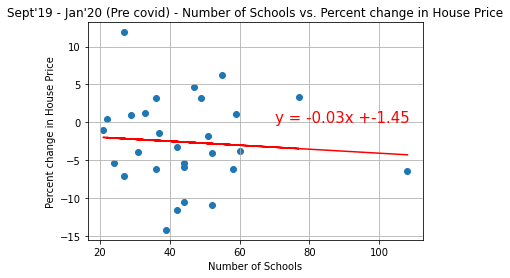

In [87]:
x_values = new_merged_lga_school["School Count"]
y_values = new_merged_lga_school["Percent change in house price"]
create_linear_regression_plot(x_values, y_values, "Number of Schools", "Percent change in House Price", "Sept'19 - Jan'20", "Pre", (70,0), ylim=None)

The linear regression model above shows no correlation between the number of schools and the percent change in median house price. This means that the change in house prices/value in a particular LGA is not affected by the number of schools in that area. It is worth mentioning that most of the data points are clustered in the 20 to 60 schools per LGA

The r-squared is: 0.4010216691230963
The correlation between both factors is 0.63


[&lt;matplotlib.lines.Line2D at 0x271ccb43e80&gt;]

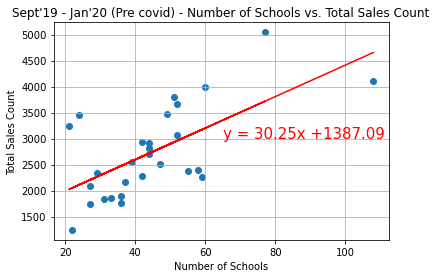

In [88]:
x_values = new_merged_lga_school["School Count"]
y_values = new_merged_lga_school["Total Sales"]
create_linear_regression_plot(x_values, y_values, "Number of Schools", "Total Sales Count", "Sept'19 - Jan'20", "Pre", (65,3000), ylim=None)

The linear regression model above shows a moderate positive correlation between the number of schools and the total sales count. This means that the higher the number of schools in any given LGA, there is a consideraly higher total sales count for that LGA. It is safe to assume that before COVID-19 there are a considerable number of buyers whose buying decisions are driven by the proximity of schools within their residence.